## **SALES PREDICTION USING PYTHON**

#### Our objective is to analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In [97]:
import pandas as pd

#### **importing our dataset**

In [99]:
data = pd.read_csv("C:/Users/User/Downloads/advertising.csv")

#### **previewing data**

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
data.shape

(200, 4)

In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### **Visualization**

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#### **Pairplot**

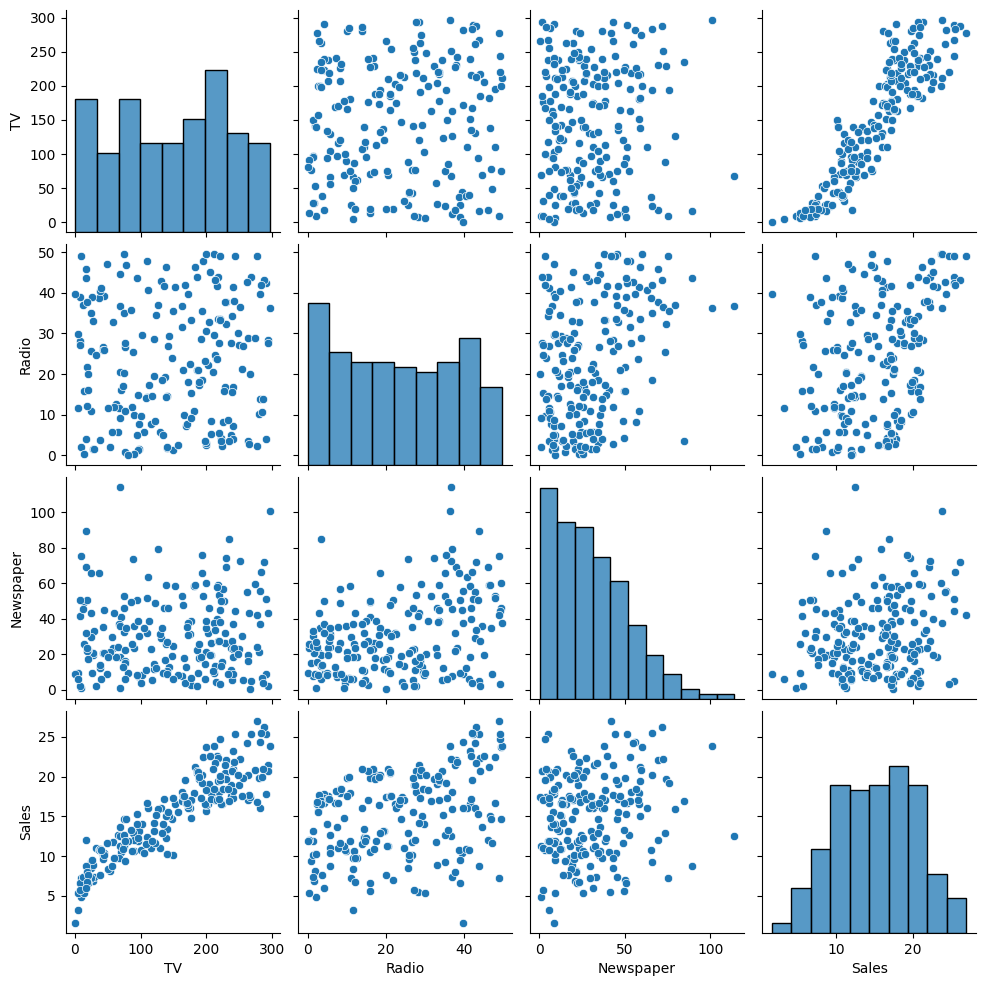

In [10]:
sns.pairplot(data)

#### **Correlation Matrix**

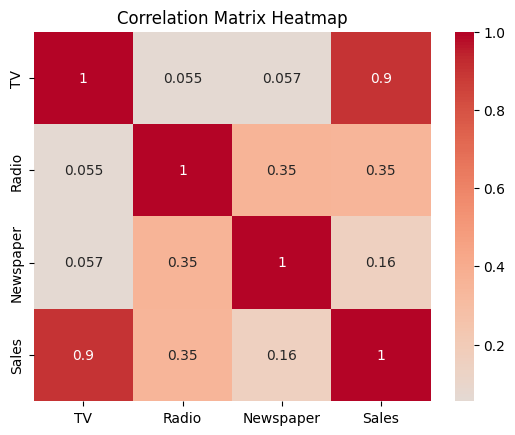

In [12]:
corr = data.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### **3D Scatter Plot**

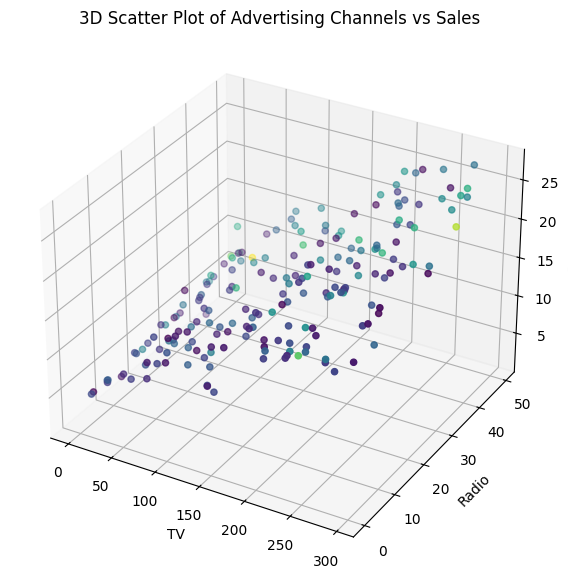

In [86]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['TV'], data['Radio'], data['Sales'], c=data['Newspaper'], cmap='viridis')

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
ax.set_title('3D Scatter Plot of Advertising Channels vs Sales')

plt.show()

#### **Regression Plot**

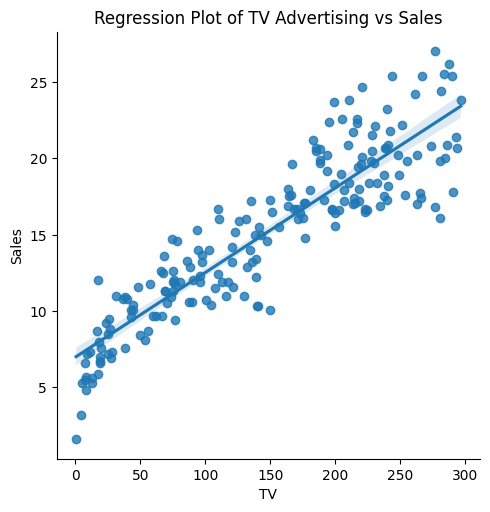

In [87]:
sns.lmplot(x='TV', y='Sales', data=data)
plt.title('Regression Plot of TV Advertising vs Sales')
plt.show()

#### **Pairwise Relationships**

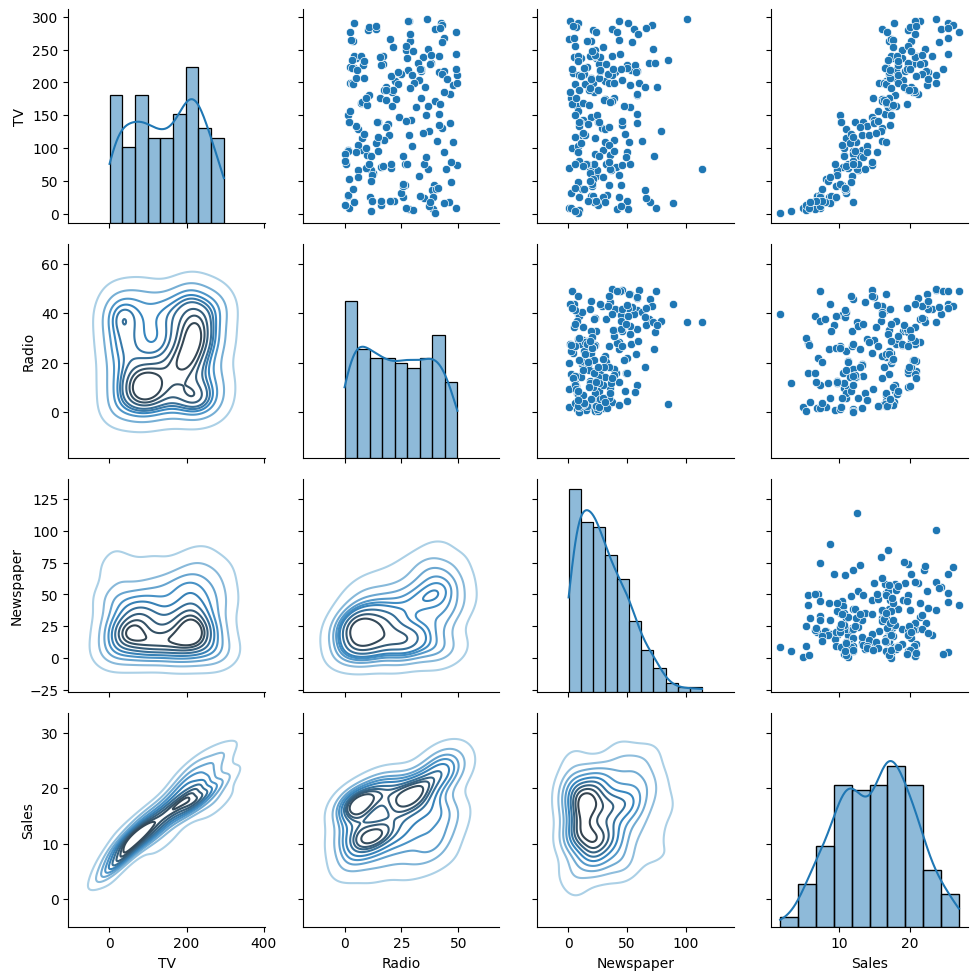

In [15]:
g = sns.PairGrid(data)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.histplot, kde=True)

### **Model**

#### We need to analyse the relationship between 'TV Advertising' and 'sales' using a simple linear regression model.

#### **importing modules**

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#### **splitting into training and testing set**

In [91]:
X_train, X_test, y_train, y_test = train_test_split(data[['TV']], data[['Sales']], test_size=0.3, random_state=0)

#### **model initialization**

In [92]:
lr = LinearRegression()

#### **Training the model**

In [93]:
lr.fit(X_train, y_train)

LinearRegression()

#### **predicting data**

In [94]:
y_pred = lr.predict(X_test)
y_pred

array([[10.93127621],
       [ 9.88042193],
       [12.09159447],
       [22.99968079],
       [16.45920756],
       [10.21976029],
       [ 7.6199906 ],
       [20.28497391],
       [ 8.4464437 ],
       [17.95886418],
       [21.44529217],
       [11.91645209],
       [15.71485245],
       [17.42249065],
       [11.32534656],
       [13.72260788],
       [21.68063975],
       [ 7.18213465],
       [11.23230217],
       [18.82362968],
       [22.88474361],
       [14.82272095],
       [16.72739433],
       [14.35202581],
       [10.07198391],
       [13.88133066],
       [16.20744039],
       [18.36388094],
       [19.40378881],
       [ 8.51759529],
       [10.85465142],
       [18.03001578],
       [22.50709285],
       [20.3725451 ],
       [ 7.86628457],
       [ 8.16731053],
       [10.40584907],
       [17.03936669],
       [10.88749061],
       [ 8.51212209],
       [ 9.16343282],
       [ 8.86788005],
       [14.96502414],
       [18.61564811],
       [18.93309367],
       [12

#### **Evaluating the model**

In [95]:
mse = mean_squared_error(y_test, y_pred)
mse

5.569539193467241

In [84]:
r2 = r2_score(y_test, y_pred)
r2

0.8150168765722069

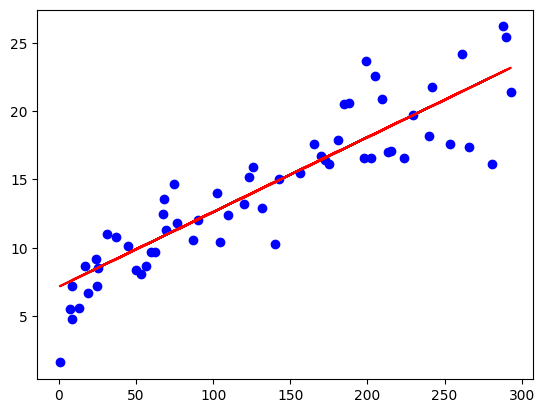

In [85]:
plt.scatter(X_test, y_test, color='blue', label='Data Points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')

### **Conclusion**

#### Based on our analysis using a simple linear regression model, we found that there is a positive relationship between TV advertising spend and sales. As the expenditure on TV advertising increases, sales tend to increase as well. This suggests that investing more in TV advertising is likely to lead to higher sales for the company.